# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [15]:
import pandas as pd
import numpy as np

# Load Airbnb dataset
airbnb_df = pd.read_csv("airbnb_hw.csv")

# Load Minnesota police use of force dataset
mn_police_df = pd.read_csv("mn_police_use_of_force.csv")

# Load Pretrial dataset
pretrial_df = pd.read_csv("October 2017 Cohort_Virginia Pretrial Data Project_Deidentified FINAL Update_10272021.csv", low_memory=False)

#1. Numeric variable
# Cleaning the Price column: Removing non-numeric characters and converting to float
airbnb_df['Price'] = airbnb_df['Price'].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)

# Count missing values in Price column
missing_prices = airbnb_df['Price'].isna().sum()

#2. Categorical variable
# Cleaning the subject_injury column: Replace missing values with 'Unknown'
mn_police_df['subject_injury'] = mn_police_df['subject_injury'].fillna('Unknown')

# Standardizing values
mn_police_df['subject_injury'] = mn_police_df['subject_injury'].replace({'Yes': 'Yes', 'No': 'No', 'UNKNOWN': 'Unknown'})

# Calculate the proportion of missing (previously NA) values
missing_subject_injury_proportion = (mn_police_df['subject_injury'] == 'Unknown').mean()

# Cross-tabulate subject_injury with force_type
cross_tab_result = pd.crosstab(mn_police_df['subject_injury'], mn_police_df['force_type'])

#3. Dummy variable
# Check if the target columns exist in the dataset
target_columns = ['WhetherDefendantWasReleasedPretrial', 'ImposedSentenceAllChargeInContactEvent']
existing_columns = [col for col in target_columns if col in pretrial_df.columns]

# Cleaning WhetherDefendantWasReleasedPretrial: Replace missing values with NaN
pretrial_df['WhetherDefendantWasReleasedPretrial'] = pretrial_df['WhetherDefendantWasReleasedPretrial'].replace({'': np.nan, 'NA': np.nan})

# Count missing values
missing_release_pretrial = pretrial_df['WhetherDefendantWasReleasedPretrial'].isna().sum()

#4. Missing values, not at random:
# Cleaning ImposedSentenceAllChargeInContactEvent: Replace missing values with NaN
pretrial_df['ImposedSentenceAllChargeInContactEvent'] = pretrial_df['ImposedSentenceAllChargeInContactEvent'].replace({'': np.nan, 'NA': np.nan})

# Count missing values
missing_imposed_sentence = pretrial_df['ImposedSentenceAllChargeInContactEvent'].isna().sum()


# Print missing values summary
print(f"Missing Prices in Airbnb Data: {missing_prices}")
print(f"Proportion of Missing subject_injury in Police Data: {missing_subject_injury_proportion:.2%}")
print(f"Missing WhetherDefendantWasReleasedPretrial in Pretrial Data: {missing_release_pretrial}")
print(f"Missing ImposedSentenceAllChargeInContactEvent in Pretrial Data: {missing_imposed_sentence}")

# Print cross-tabulation result
print("Cross-tabulation of subject_injury with force_type:")
print(cross_tab_result)

Missing Prices in Airbnb Data: 0
Proportion of Missing subject_injury in Police Data: 76.19%
Missing WhetherDefendantWasReleasedPretrial in Pretrial Data: 0
Missing ImposedSentenceAllChargeInContactEvent in Pretrial Data: 0
Cross-tabulation of subject_injury with force_type:
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Unknown             2          7051               1421        0   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             33                 34            0   
Unknown                        27                 74           87   
Yes                            44                 40            0   

force_type      Less Lethal Projectile  Ma

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

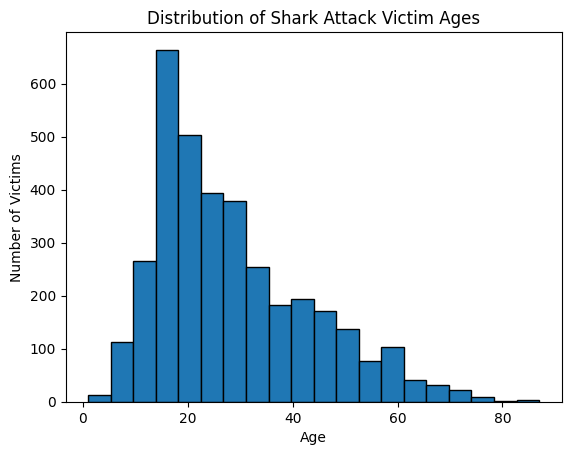

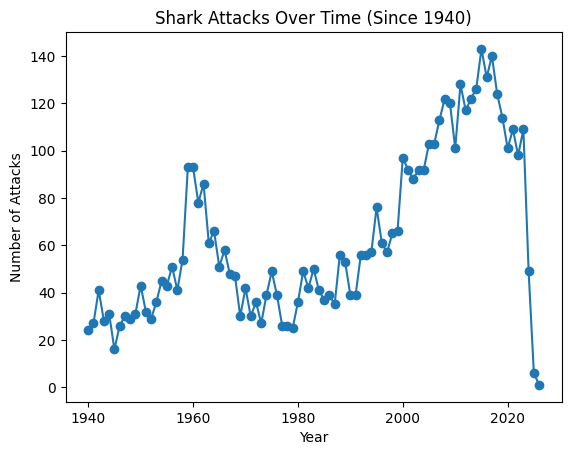

Proportion of Male Victims: 78.75%
Proportion of Unprovoked Attacks: 74.29%

Fatality Rate by Gender:
Fatal Y/N         N        NQ   Unknown         Y  Y X 2
Sex                                                     
F          0.861538  0.001538  0.003077  0.133846    NaN
LLI        1.000000       NaN       NaN       NaN    NaN
M          0.830961       NaN  0.007241  0.161798    NaN
M X 2           NaN       NaN       NaN       NaN    1.0

Fatality Rate by Attack Type:
Fatal Y/N                   N        NQ   Unknown         Y     Y X 2
Type                                                                 
?                    1.000000       NaN       NaN       NaN       NaN
Provoked             0.966862       NaN  0.007797  0.025341       NaN
Unknown              0.398990       NaN  0.010101  0.585859  0.005051
Unprovoked           0.822162  0.000247  0.009646  0.167945       NaN
boat                 1.000000       NaN       NaN       NaN       NaN
under investigation  1.000000      

In [19]:
import matplotlib.pyplot as plt

#1. Load Dataset
shark_df = pd.read_excel("GSAF5.xlsx")

#2. Dropping empty or redundant columns
columns_to_drop = ['Unnamed: 21', 'Unnamed: 22', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1']
shark_df = shark_df.drop(columns=[col for col in columns_to_drop if col in shark_df.columns])

#3.
# Convert Year to numeric and drop invalid values
shark_df['Year'] = pd.to_numeric(shark_df['Year'], errors='coerce')

# Filter rows for attacks since 1940
shark_df = shark_df[shark_df['Year'] >= 1940]

# Analyze trends in attacks over time
yearly_attacks = shark_df['Year'].value_counts().sort_index()

#4.
# Convert Age to numeric where possible
shark_df['Age'] = pd.to_numeric(shark_df['Age'], errors='coerce')

#5.
# Standardizing gender representation
shark_df['Sex'] = shark_df['Sex'].str.upper().str.strip()

# Calculate proportion of male victims
male_proportion = (shark_df['Sex'] == 'M').mean()

#6.
# Standardizing Type to three categories: Provoked, Unprovoked, Unknown
shark_df['Type'] = shark_df['Type'].str.lower().str.strip().replace({
    'unprovoked': 'Unprovoked',
    'provoked': 'Provoked',
    'questionable': 'Unknown',
    'sea disaster': 'Unknown',
    'invalid': 'Unknown'
})

# Proportion of unprovoked attacks
unprovoked_proportion = (shark_df['Type'] == 'Unprovoked').mean()

#7.
# Standardizing Fatal Y/N column to three values: Y, N, Unknown
shark_df['Fatal Y/N'] = shark_df['Fatal Y/N'].str.upper().str.strip().replace({
    'N': 'N',
    'Y': 'Y',
    'UNKNOWN': 'Unknown',
    'M': 'Unknown',  # Handling miscoded values
    'F': 'Unknown'
})

#8.
# Count fatality rates by gender
fatal_by_gender = shark_df.groupby('Sex')['Fatal Y/N'].value_counts(normalize=True).unstack()

# Count fatality rates by attack type (provoked vs unprovoked)
fatal_by_attack_type = shark_df.groupby('Type')['Fatal Y/N'].value_counts(normalize=True).unstack()

#9.
# Fix column name (remove trailing space)
shark_df = shark_df.rename(columns=lambda x: x.strip())

# Convert to lowercase for consistency
shark_df['Species'] = shark_df['Species'].astype(str).str.lower()

# Proportion of attacks by white sharks
white_shark_proportion = shark_df['Species'].str.contains('white shark', na=False).mean()


# Display histogram of ages
plt.hist(shark_df['Age'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.title('Distribution of Shark Attack Victim Ages')
plt.show()

# Display attack trends over time
plt.plot(yearly_attacks.index, yearly_attacks.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Shark Attacks Over Time (Since 1940)')
plt.show()

# Output summary statistics
print(f"Proportion of Male Victims: {male_proportion:.2%}")
print(f"Proportion of Unprovoked Attacks: {unprovoked_proportion:.2%}")
print("\nFatality Rate by Gender:")
print(fatal_by_gender)
print("\nFatality Rate by Attack Type:")
print(fatal_by_attack_type)
print(f"\nProportion of Attacks by White Sharks: {white_shark_proportion:.2%}")

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

1. The most recent US Census gathered race data using self-dientification through survey forms. Respondents to surveys were asked to select their race categories, indicate if they were hispanic or latino, and provide more detail about their tribal affiliation, if applicable. This data was collected through online and paper census forms. But for non-responders, there were phone and in-person interviews. The 2020 Census allowed respondents to select multiple racial identities, which improves the accuracy of racial diversity representation.

2. We collect race and demographic data for multiple reasons: to ensure fair political representation, allocate government resources, monitor civil rights compliance, and improve public policies. The data quality matters because inaccurate data can lead to misallocation of resources, undercounting minority groups can lead to unequal political representation, and poor categorization can erase or oversimplify racial identities.

3. In my opinion, there were a couple of thigns done well. These include allowing multiple race selections, which improved representation of multiracial individuals, and including open-ended fields, which allowed better self-identification. But there were also a couple things that were missing or problematic. This included the fact that they categorized Hispanic/Latino as an ethnicity instead of a race, which can be confusing. On top of that, there were limited racial options for Indigenous and Middle Eastern/North African groups. And finally, undocumented immigrants and marginalized groups may fear responding due to privacy concerns. As for how to improve future surveys, they could expand racial categories, improve public trust through confidentiality policies, and offer culturally relevant outreach to improve participation.

4. The US Census currently collects data on "Sex" but not "Gender", using only binary categories, which are Male and Female. This made the survey simple and easy to answer, especially because the Census clarified that "sex" referred to biological sex assigned at birth. But on the other side, some criticism is that there is no option for non-binary or transgender individuals, lack of clarity on how sex/gender data is used, leading to privacy concerns, and limited ability to track discrimination against LGBTQ+ communities. They could look to improve in future surveys by differentiating "Sex" and "Gender Identity" in questions, include non-binary and transgender options, and ensuring privacy protections to encourage participation from LGBTQ+ communities.

5. The challenges when cleaning race and gender data arise when there are missing values, misclassification occurs, or there is inconsistent categorization. Misclassification refers to respondents misreporting or misunderstanding categories. Inconsistent categorization refers to comparability being affected if the definitions of race and gender change over time. Good practices in cleaning data here would be to allow respondents to self-identify instead of making assumptions, provide an "Unknown" or "Prefer Not to Say" category instead of imputing values, and documenting data processing methods transparently. Finally, bad practices in cleaning data include forcing a category on individuals based on appearance or name, collapsing diverse groups into broad categories, and imputing gender or race based on statistical assumptions, which can introduce bias.

6. The concerns associated with predictions would be privacy violations of their information, bias in the AI models, which could lead to discriminatory outcomes. Furthermore, AI models could assume gender/race based on name, location, or appearance, which could misrepresent people. Finally, if this AI model is used in hiring, credit, or policing, it could reinforce systemic racism or sexism. The best ethical practices here would be to not use AI to impute protected characteristics without consent, allow self-identification instead of assumptions, and ensure transparency in AI decision-making.